## Import Statements

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from ast import literal_eval

## Upload Dataset

In [3]:
samples = pd.read_csv('../../data/Custom/combined_1.csv')
samples = samples.drop('Unnamed: 0', axis=1)
display(samples)

,Title,180 Usage,Addresses,Article Number,Authors,Authors (Full),Class,DOI,Document Type,Email,...,Usage Since 2013,Volume,WOS Categories,Abstract Column,Cited References,Export Date,idk,Issue,Book Editors,DOI2
0,Editorial: Physical neuromorphic computing and...,2,"['[Yamane, Toshiyuki] IBM Res Tokyo, Tokyo, Ja...",1238168,"['Yamane, T', 'Hirose, A', 'Offrein, BJ']","['Yamane, Toshiyuki', 'Hirose, Akira', 'Offrei...",N,10.3389/fninf.2023.1238168,Editorial Material,tyamane@jp.ibm.com,...,2,17,Mathematical & Computational Biology; Neurosci...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Neuromorphic Hardware Based on Artificial Syna...,10,"['[Li, J.; Zhao, C.] Xian Jiaotong Liverpool U...",NaN,"['Li, J', 'Zhao, C', 'Man, K']","['Li, J.', 'Zhao, C.', 'Man, K.', 'GP IEEE']",N,10.1109/ISOCC56007.2022.10031458,"['Proceedings Paper', 'CT 19th International S...",NaN,...,10,NaN,"['Computer Science, Hardware & Architecture; C...",Inspired by the structure and functions of the...,"['10.1038/nature03010', '10.1146/annurev.neuro...",NaN,188,NaN,NaN,NaN
2,Opportunities for neuromorphic computing algor...,6,"['[Schuman, Catherine D.; Kulkarni, Shruti R.;...",NaN,"['Schuman, CD', 'Kulkarni, SR', 'Parsa, M', 'M...","['Schuman, Catherine D.', 'Kulkarni, Shruti R....",N,10.1038/s43588-021-00184-y,"['Article', 'ID NEURAL-NETWORK ARCHITECTURE; C...",cschuman@utk.edu,...,19,2,"['Computer Science, Interdisciplinary Applicat...",Neuromorphic computing technologies will be im...,"['Aimone J. B., 2018, P 3 INT WORKSHOP POS, P2...",NaN,19,1,NaN,NaN
3,Heterogeneously Integrated III-V on Silicon Ph...,1,"['[Tossoun, Bassem; Jha, Aashu; Giamougiannis,...",NaN,"['Tossoun, B', 'Jha, A', 'Giamougiannis, G', '...","['Tossoun, Bassem', 'Jha, Aashu', 'Giamougiann...",N,10.1109/SUM57928.2023.10224393,"['Proceedings Paper', 'CT IEEE-Photonics-Socie...",bassem.tossoun@hpe.com,...,1,NaN,Nanoscience & Nanotechnology; Optics; Telecomm...,"At Hewlett Packard Labs, an energy-efficient, ...","['Babbage Charles, 2022, PASSAGES LIFE PHILOS'...",NaN,NaN,NaN,NaN,NaN
4,Editorial: Focus on algorithms for neuromorphi...,1,"['[Legenstein, Robert] Graz Univ Technol, Graz...",030402,"['Legenstein, R', 'Basu, A', 'Panda, P']","['Legenstein, Robert', 'Basu, Arindam', 'Panda...",N,10.1088/2634-4386/ace991,Editorial Material,NaN,...,1,3,"Engineering, Electrical & Electronic; Physics,...",Neuromorphic computing provides a promising en...,"['10.1088/2634-4386/ac9899', '10.1088/2634-438...",NaN,NaN,3,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,Neural Bursting and Synchronization Emulated b...,40,"['[Lin, Hairong; Wang, Chunhua; Zhou, Chao; Xu...",NaN,"['Lin, HR', 'Wang, CH', 'Chen, CJ', 'Sun, YC',...","['Lin, Hairong', 'Wang, Chunhua', 'Chen, Cheng...",S,10.1109/TCSI.2021.3081150,Article,wch1227164@hnu.edu.cn,...,172,68,"Engineering, Electrical & Electronic","Nowadays, research, modeling, simulation and r...","['10.1007/s11071-019-05395-7', '10.1142/S02181...",NaN,3410,8,NaN,NaN
4957,Using a Low-Power Spiking Continuous Time Neur...,0,"['[Bensimon, Moshe; Greenberg, Shlomo] Ben Gur...",1065,"['Bensimon, M', 'Greenberg, S', 'Haiut, M']","['Bensimon, Moshe', 'Greenberg, Shlomo', 'Haiu...",S,10.3390/s21041065,Article,bensimmo@post.bgu.ac.il; shlomog@bgu.ac.il; Mo...,...,9,21,"['Chemistry, Analytical; Engineering, Electric...",This work presents a new approach based on a s...,"['[Anonymous], 2013, 2013 INT JOINT C NEU', '[...",NaN,NaN,4,NaN,NaN
4958,Model Based Verification of Spiking Neural Net...,5,"['[Pradhan, Ankit] Univ Texas Austin, Austin, ...",NaN,"['Pradhan, A', 'King, J', 'Pinisetty, S', 'Roo...","['Pradhan, Ankit', 'King, Jonathan', 'Pinisett...",S,10.1109/TC.2023.3251841,Article,['ankpradh@cs.utexas.edu; jkin677@aucklanduni....,...,5,72,"['Computer Science, Hardware & Architecture; E...",Spiking Neural Networks (SNNs) have found incr...,"['arXiv:1606.08514', '10.1016/0304-3975(94)900...",NaN,2439,9,NaN,NaN
4959,Navigating Local Minima in

In [4]:
edges = pd.read_csv('../../data/Custom/combined_edges.csv')
edges = edges.drop('Unnamed: 0', axis=1)
display(edges)
# DOI is node, class is classification, and cited references show edges

,DOI,Cited References
0,10.1109/ISOCC56007.2022.10031458,10.1038/nature03010
1,10.1109/ISOCC56007.2022.10031458,10.1146/annurev.neuro.31.060407.125639
2,10.1109/ISOCC56007.2022.10031458,"Goodfellow I, 2016, ADAPT COMPUT MACH LE, P1"
3,10.1109/ISOCC56007.2022.10031458,10.1038/s41928-021-00646-1
4,10.1109/ISOCC56007.2022.10031458,"HEBB D. O., 1949"
...,...,...
215732,10.1007/978-3-319-39552-4_3,"Scholze S., 2010, 2010 MIXDES - 17th Internati..."
215733,10.1007/978-3-319-39552-4_3,"[10.1016/j.vlsi.2011.05.003,"
215734,10.1007/978-3-319-39552-4_3,"Scholze S, 2011, FRONT NEUROSCI, V5, P1"
215735,10.1007/978-3-319-39552-4_3,10.1073/pnas.94.2.719


In [5]:
data = samples[['DOI','Class']].copy()
data = data.drop_duplicates('DOI')
data = data.reset_index()
display(data)

,index,DOI,Class
0,0,10.3389/fninf.2023.1238168,N
1,1,10.1109/ISOCC56007.2022.10031458,N
2,2,10.1038/s43588-021-00184-y,N
3,3,10.1109/SUM57928.2023.10224393,N
4,4,10.1088/2634-4386/ace991,N
...,...,...,...
4951,4956,10.1109/TCSI.2021.3081150,S
4952,4957,10.3390/s21041065,S
4953,4958,10.1109/TC.2023.3251841,S
4954,4959,10.1109/AICAS54282.2022.9869966,S


In [6]:
wos_cites = pd.read_csv('../../data/Custom/wos.cites.csv',names=['target','source'])
# wos_cites.drop(0)
# display(wos_cites)
# wos_cites = edges

wos_content = pd.read_csv('../../data/Custom/wos.content.csv')
wos_content = wos_content[wos_content['paper_id'].notna()]
# wos_content
# display(wos_content)

column_names = ["paper_id"] + ["class_label"] + [word for word in wos_content['word_cited_id'].unique()]
wos_paper = pd.read_csv('../../data/Custom/wos.paper.csv',names=column_names)
wos_paper = wos_paper.drop_duplicates('paper_id')
wos_paper = wos_paper.reset_index()
wos_paper = data.drop('index',axis=1)
# wos_paper = wos_paper.drop(0)
# display(wos_paper)

wos_cites = wos_cites.drop(0)
display(wos_cites)
wos_paper = wos_paper.drop(0)
# wos_paper.loc[wos_paper['Class'] == 'N', 'Class'] = 'Neuromorphic'
# wos_paper = wos_paper.drop('index',axis=1)
display(wos_paper)

,target,source
1,10.1109/EMCSI39492.2022.9889639,10.1007/978-3-030-81645-2_7
2,10.1109/EMCSI39492.2022.9889639,10.1109/JETCAS.2021.3074608
3,10.1109/EMCSI39492.2022.9889639,10.1007/978-3-030-61638-0_11
4,10.1109/iecon43393.2020.9255001,10.1109/JSAC.2019.2904348
5,10.1109/melecon48756.2020.9140602,10.3390/s20092533
...,...,...
10178,10.3390/s21041065,10.1109/TNN.2004.832719
10179,10.3390/s21041065,10.1016/j.physa.2017.08.053
10180,10.3390/s21041065,10.1109/TBCAS.2017.2759700
10181,10.1109/TC.2023.3251841,10.1109/TNN.2004.832719


,DOI,Class
1,10.1109/ISOCC56007.2022.10031458,N
2,10.1038/s43588-021-00184-y,N
3,10.1109/SUM57928.2023.10224393,N
4,10.1088/2634-4386/ace991,N
5,10.1016/j.vlsi.2017.11.001,N
...,...,...
4951,10.1109/TCSI.2021.3081150,S
4952,10.3390/s21041065,S
4953,10.1109/TC.2023.3251841,S
4954,10.1109/AICAS54282.2022.9869966,S


In [7]:
print(len(wos_content['word_cited_id'].unique()))

4134


In [8]:
display(wos_content)

,paper_id,word_cited_id
0,10.1109/EMCSI39492.2022.9889639,learning
1,10.1109/EMCSI39492.2022.9889639,development
2,10.1109/EMCSI39492.2022.9889639,represents
3,10.1109/EMCSI39492.2022.9889639,direction
4,10.1109/EMCSI39492.2022.9889639,research
...,...,...
47934,10.1109/AICAS54282.2022.9869966,networks
47935,10.1109/AICAS54282.2022.9869966,backpropagation
47936,10.1109/AICAS54282.2022.9869966,absence
47937,10.1109/AICAS54282.2022.9869966,challenges


In [9]:
wos_paper = wos_paper.set_index('DOI')
for word in wos_content['word_cited_id'].unique():
    wos_paper[word] = 0


c:\Users\reece\miniconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
display(wos_paper)

,Class,learning,development,represents,direction,research,computational,capabilities,resulting,increasing,...,moderated,interwoven,topographically,representatives,transferability,discriminant,employ,autonomously,safety,formally
DOI,,,,,,,,,,,,,,,,,,,,,
10.1109/ISOCC56007.2022.10031458,N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1038/s43588-021-00184-y,N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/SUM57928.2023.10224393,N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1088/2634-4386/ace991,N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1016/j.vlsi.2017.11.001,N,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1109/TCSI.2021.3081150,S,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.3390/s21041065,S,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.1109/TC.2023.3251841,S,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
for index, row in wos_content.iterrows(): # mark as true for words used by each paper
    wos_paper.at[str(row['paper_id']), str(row['word_cited_id'])] = 1


In [12]:
display(wos_paper)

,Class,learning,development,represents,direction,research,computational,capabilities,resulting,increasing,...,moderated,interwoven,topographically,representatives,transferability,discriminant,employ,autonomously,safety,formally
DOI,,,,,,,,,,,,,,,,,,,,,
10.1109/ISOCC56007.2022.10031458,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1038/s43588-021-00184-y,N,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1109/SUM57928.2023.10224393,N,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1088/2634-4386/ace991,N,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1016/j.vlsi.2017.11.001,N,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1109/TNNLS.2021.3110991,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.1007/s11063-020-10322-8,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10.1007/s00371-020-02012-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
wos_paper = wos_paper.dropna()
display(wos_paper)

,Class,learning,development,represents,direction,research,computational,capabilities,resulting,increasing,...,moderated,interwoven,topographically,representatives,transferability,discriminant,employ,autonomously,safety,formally
DOI,,,,,,,,,,,,,,,,,,,,,
10.1109/ISOCC56007.2022.10031458,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1038/s43588-021-00184-y,N,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1109/SUM57928.2023.10224393,N,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1088/2634-4386/ace991,N,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1016/j.vlsi.2017.11.001,N,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10.1109/TCSI.2021.3081150,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.3390/s21041065,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.1109/TC.2023.3251841,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [14]:
wos_paper = wos_paper.reset_index()
print(wos_paper.shape)
display(wos_paper)

(4955, 4136)


,DOI,Class,learning,development,represents,direction,research,computational,capabilities,resulting,...,moderated,interwoven,topographically,representatives,transferability,discriminant,employ,autonomously,safety,formally
0,10.1109/ISOCC56007.2022.10031458,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10.1038/s43588-021-00184-y,N,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.1109/SUM57928.2023.10224393,N,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10.1088/2634-4386/ace991,N,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10.1016/j.vlsi.2017.11.001,N,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,10.1109/TCSI.2021.3081150,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4951,10.3390/s21041065,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4952,10.1109/TC.2023.3251841,S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4953,10.1109/AICAS54282.2022.9869966,S,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
wos_cites = wos_cites[wos_cites['source'].isin(wos_paper['DOI'])]
wos_cites = wos_cites[wos_cites['target'].isin(wos_paper['DOI'])]

In [16]:
display(wos_cites)

,target,source
1,10.1109/EMCSI39492.2022.9889639,10.1007/978-3-030-81645-2_7
2,10.1109/EMCSI39492.2022.9889639,10.1109/JETCAS.2021.3074608
3,10.1109/EMCSI39492.2022.9889639,10.1007/978-3-030-61638-0_11
4,10.1109/iecon43393.2020.9255001,10.1109/JSAC.2019.2904348
5,10.1109/melecon48756.2020.9140602,10.3390/s20092533
...,...,...
10177,10.3390/s21041065,10.1007/978-3-319-18164-6_6
10178,10.3390/s21041065,10.1109/TNN.2004.832719
10179,10.3390/s21041065,10.1016/j.physa.2017.08.053
10180,10.3390/s21041065,10.1109/TBCAS.2017.2759700


## Visualization

In [17]:
class_values = sorted(wos_paper["Class"].unique()) # one hot encoding of rest of variables
class_idx = {name: id for id, name in enumerate(class_values)}
paper_idx = {name: idx for idx, name in enumerate(sorted(wos_paper["DOI"].unique()))}

wos_cites["source"] = wos_cites["source"].apply(lambda name: paper_idx[name])
wos_cites["target"] = wos_cites["target"].apply(lambda name: paper_idx[name])
wos_paper["DOI"] = wos_paper["DOI"].apply(lambda name: paper_idx[name])
wos_paper["Class"] = wos_paper["Class"].apply(lambda value: class_idx[value])

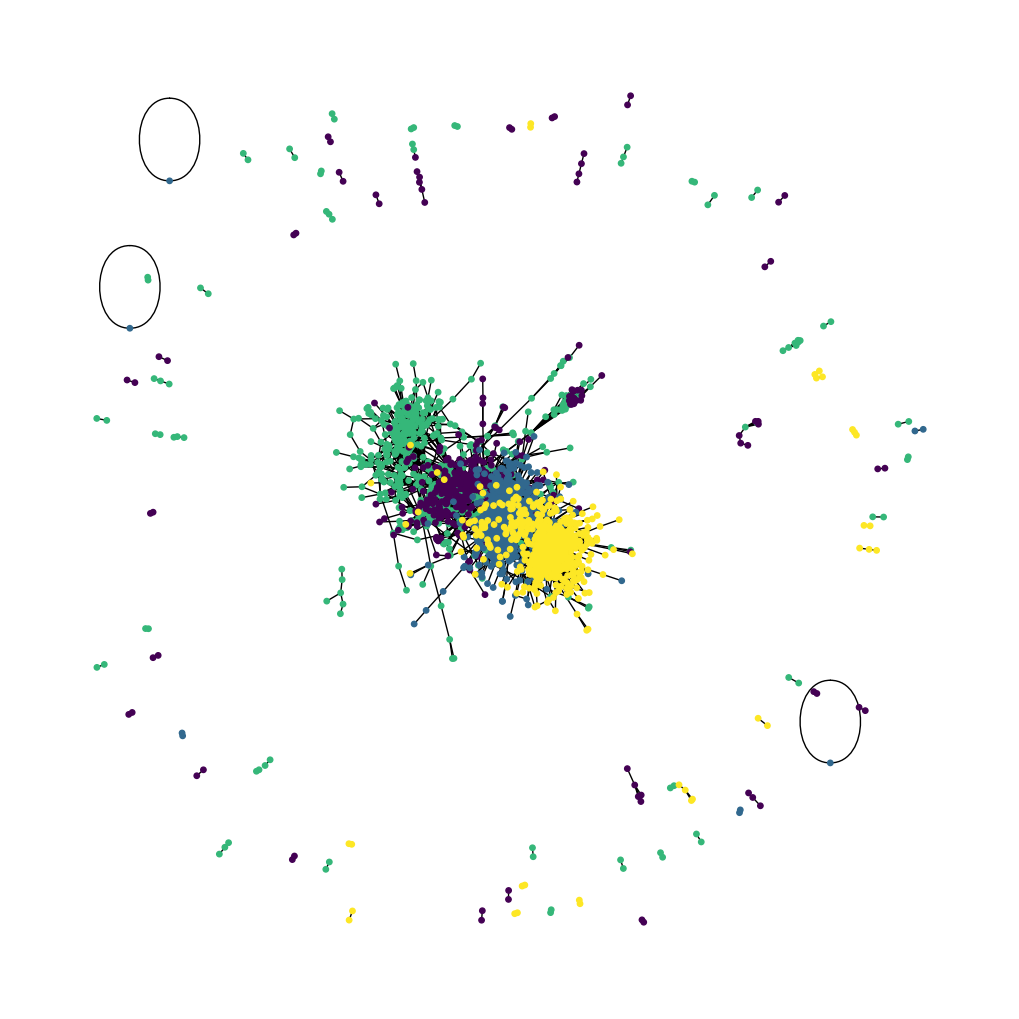

In [18]:
plt.figure(figsize=(10, 10))
colors = wos_paper["Class"].tolist()
wos_graph = nx.from_pandas_edgelist(wos_cites)#.sample(n=1500))
subjects = list(wos_paper[wos_paper["DOI"].isin(list(wos_graph.nodes))]["Class"])
nx.draw_spring(wos_graph, node_size=15, node_color=subjects)

## Graph Characteristics

In [19]:
print(nx.average_clustering(wos_graph))
# print(nx.average_shortest_path_length(wos_graph))
print(min([nx.diameter(wos_graph.subgraph(g).copy()) for g in nx.connected_components(wos_graph)]))
print(nx.average_degree_connectivity(wos_graph))
print(np.average([j for i,j in wos_graph.degree()]))

0.13529700046860418
0
{4: 31.629554655870447, 3: 31.883040935672515, 6: 30.088709677419356, 69: 5.463768115942029, 1: 30.68988173455979, 22: 21.59659090909091, 36: 11.069444444444445, 17: 24.331932773109244, 16: 20.151785714285715, 93: 9.268817204301076, 2: 36.89316239316239, 7: 29.8600583090379, 10: 26.22340425531915, 26: 14.915384615384616, 20: 19.308333333333334, 13: 26.296153846153846, 5: 32.27231638418079, 100: 9.78, 25: 17.19, 102: 10.009803921568627, 12: 18.99621212121212, 9: 28.725252525252525, 8: 24.55787037037037, 11: 28.07523510971787, 58: 14.46551724137931, 59: 7.220338983050848, 54: 12.333333333333334, 21: 26.154761904761905, 28: 17.785714285714285, 34: 8.735294117647058, 80: 9.05, 103: 7.606796116504855, 23: 25.68695652173913, 15: 24.285714285714285, 18: 20.23148148148148, 41: 18.01219512195122, 14: 27.060439560439562, 19: 23.513157894736842, 67: 8.119402985074627, 65: 11.876923076923077, 64: 8.734375, 27: 19.62962962962963, 248: 6.237903225806452, 192: 10.015625, 37: 8.7

In [21]:
print(len(wos_graph.nodes))
print(len(wos_graph.edges))

2605
6600


: 

## Node Classification

Base NN

In [158]:
train_data, test_data = [], []

for _, group_data in wos_paper.groupby("Class"):
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.8
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)


Train data shape: (3983, 4136)
Test data shape: (972, 4136)


In [159]:
hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 300
batch_size = 256

In [160]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(
        monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=[early_stopping],
    )

    return history
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="lower right")
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)



In [161]:
feature_names = set(wos_paper.columns) - {"DOI", "Class"}
num_features = len(feature_names)
num_classes = len(class_idx)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()
# Create train and test targets as a numpy array.
y_train = train_data["Class"]
y_test = test_data["Class"]

In [162]:
def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):
        # Create an FFN block.
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        # Add skip connection.
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])
    # Compute logits.
    logits = layers.Dense(num_classes, name="logits")(x)
    # Create the model.
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features (InputLayer)    [(None, 4134)]       0           []                               
                                                                                                  
 ffn_block1 (Sequential)        (None, 32)           150040      ['input_features[0][0]']         
                                                                                                  
 ffn_block2 (Sequential)        (None, 32)           2368        ['ffn_block1[0][0]']             
                                                                                                  
 skip_connection2 (Add)         (None, 32)           0           ['ffn_block1[0][0]',             
                                                                  'ffn_block2[0][0]']      

In [163]:
history = run_experiment(baseline_model, x_train, y_train)

Epoch 1/300
14/14 [==============================] - 10s 120ms/step - loss: 2.7380 - acc: 0.2815 - val_loss: 1.4404 - val_acc: 0.2659
Epoch 2/300
14/14 [==============================] - 1s 45ms/step - loss: 1.6820 - acc: 0.3179 - val_loss: 1.4399 - val_acc: 0.2425
Epoch 3/300
14/14 [==============================] - 1s 43ms/step - loss: 1.4938 - acc: 0.3495 - val_loss: 1.7228 - val_acc: 0.2007
Epoch 4/300
14/14 [==============================] - 1s 48ms/step - loss: 1.3847 - acc: 0.4035 - val_loss: 1.4171 - val_acc: 0.2391
Epoch 5/300
14/14 [==============================] - 1s 40ms/step - loss: 1.2724 - acc: 0.4399 - val_loss: 1.2900 - val_acc: 0.4214
Epoch 6/300
14/14 [==============================] - 1s 37ms/step - loss: 1.1886 - acc: 0.5013 - val_loss: 1.3331 - val_acc: 0.2860
Epoch 7/300
14/14 [==============================] - 1s 38ms/step - loss: 1.1183 - acc: 0.5356 - val_loss: 1.5475 - val_acc: 0.2040
Epoch 8/300
14/14 [==============================] - 1s 38ms/step - loss: 

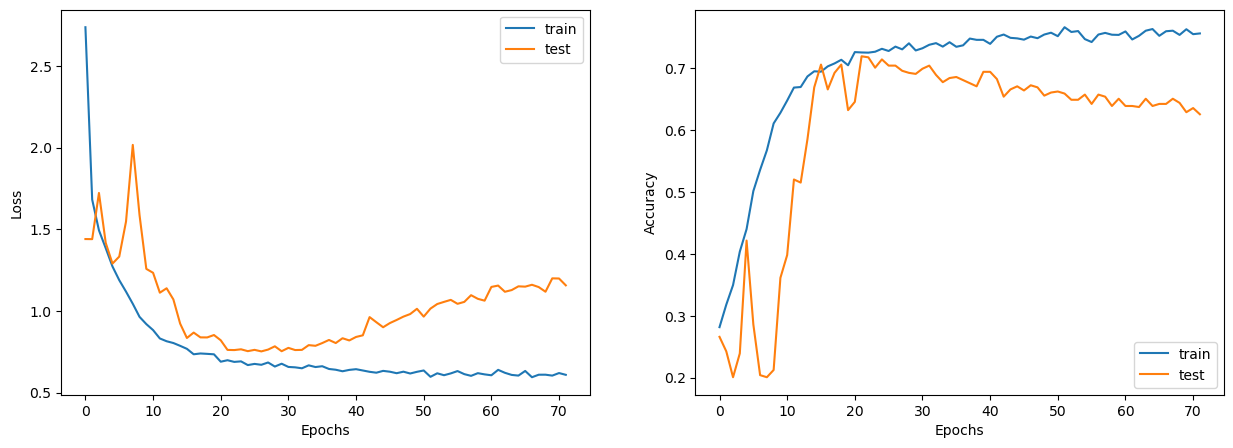

Test accuracy: 70.58%


In [164]:
display_learning_curves(history)
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

In [165]:
def generate_random_instances(num_instances):
    token_probability = x_train.mean(axis=0)
    instances = []
    for _ in range(num_instances):
        probabilities = np.random.uniform(size=len(token_probability))
        instance = (probabilities <= token_probability).astype(int)
        instances.append(instance)

    return np.array(instances)


def display_class_probabilities(probabilities):
    for instance_idx, probs in enumerate(probabilities):
        print(f"Instance {instance_idx + 1}:")
        for class_idx, prob in enumerate(probs):
            print(f"- {class_values[class_idx]}: {round(prob * 100, 2)}%")


In [166]:
new_instances = generate_random_instances(num_classes)
logits = baseline_model.predict(new_instances)
probabilities = keras.activations.softmax(tf.convert_to_tensor(logits)).numpy()
display_class_probabilities(probabilities)

1/1 [==============================] - 1s 520ms/step
Instance 1:
- E: 18.42%
- M: 56.37%
- N: 13.99%
- S: 11.22%
Instance 2:
- E: 56.57%
- M: 13.88%
- N: 15.66%
- S: 13.89%
Instance 3:
- E: 18.08%
- M: 23.3%
- N: 41.76%
- S: 16.86%
Instance 4:
- E: 34.61%
- M: 25.32%
- N: 25.19%
- S: 14.88%


GNN

In [167]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = wos_cites[["source", "target"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    wos_paper.sort_values("DOI")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)


Edges shape: (2, 6600)
Nodes shape: (4955, 4134)


In [168]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim]
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.

        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """

        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices, neighbour_messages, node_repesentations
        )
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)


In [169]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super().__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)


In [198]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[ 0.15918604 -0.11336124  0.24730512 -0.04003806]
 [ 0.02382666  0.17735143 -0.1003837   0.10726031]
 [ 0.0011265   0.17025334  0.05634595  0.00474115]], shape=(3, 4), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (4955, 32)                150040    
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 postprocess (Sequential)    (4955, 32)                2368      
                                          

In [199]:
x_train = train_data.DOI.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)


Epoch 1/300
14/14 [==============================] - 13s 536ms/step - loss: 1.5963 - acc: 0.2597 - val_loss: 1.3957 - val_acc: 0.2007
Epoch 2/300
14/14 [==============================] - 6s 462ms/step - loss: 1.4361 - acc: 0.2641 - val_loss: 1.3997 - val_acc: 0.2007
Epoch 3/300
14/14 [==============================] - 6s 449ms/step - loss: 1.3986 - acc: 0.2801 - val_loss: 1.3859 - val_acc: 0.2843
Epoch 4/300
14/14 [==============================] - 6s 423ms/step - loss: 1.3769 - acc: 0.3188 - val_loss: 1.3822 - val_acc: 0.2926
Epoch 5/300
14/14 [==============================] - 6s 411ms/step - loss: 1.3729 - acc: 0.3270 - val_loss: 1.3749 - val_acc: 0.3194
Epoch 6/300
14/14 [==============================] - 5s 392ms/step - loss: 1.3438 - acc: 0.3536 - val_loss: 1.3572 - val_acc: 0.2793
Epoch 7/300
14/14 [==============================] - 5s 383ms/step - loss: 1.3241 - acc: 0.3705 - val_loss: 1.3343 - val_acc: 0.4197
Epoch 8/300
14/14 [==============================] - 5s 379ms/step -

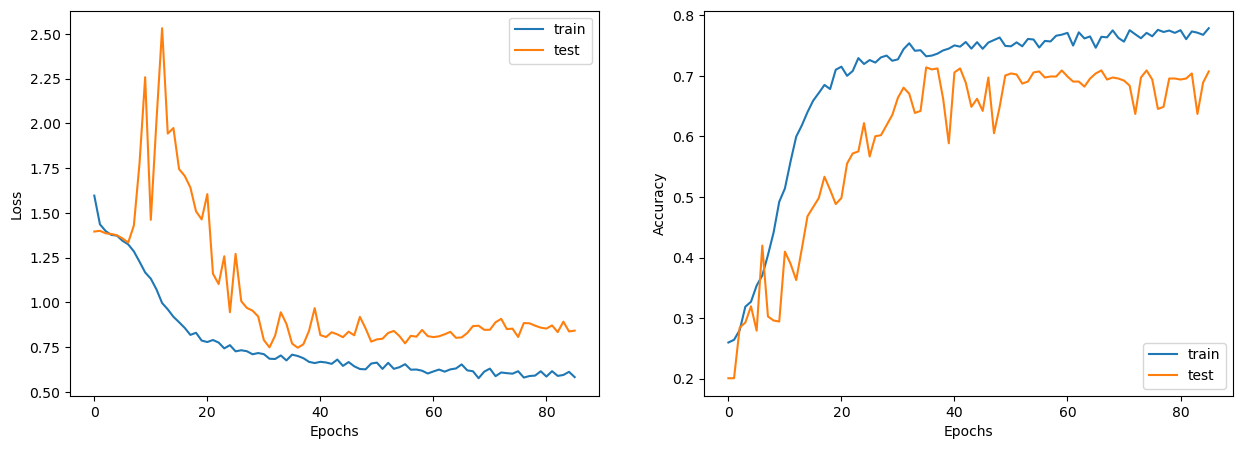

Test accuracy: 69.44%


In [200]:
display_learning_curves(history)
x_test = test_data.DOI.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

## Link Prediction

In [173]:
import stellargraph as sg
from stellargraph.data import EdgeSplitter
from stellargraph.mapper import FullBatchLinkGenerator
from stellargraph.layer import GCN, LinkEmbedding
from stellargraph import StellarGraph


from tensorflow import keras
from sklearn import preprocessing, feature_extraction, model_selection

from stellargraph import globalvar
from stellargraph import datasets
from IPython.display import display, HTML
%matplotlib inline

In [174]:
node_features = wos_paper[wos_paper['DOI'].isin(wos_graph.nodes)]
wos = StellarGraph.from_networkx(wos_graph,node_features=node_features.set_index('DOI').drop('Class',axis=1))
print(wos.info())

StellarGraph: Undirected multigraph
 Nodes: 2605, Edges: 6600

 Node types:
  default: [2605]
    Features: float32 vector, length 4134
    Edge types: default-default->default

 Edge types:
    default-default->default: [6600]
        Weights: all 1 (default)
        Features: none


In [175]:
# Define an edge splitter on the original graph G:
edge_splitter_test = EdgeSplitter(wos)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G, and obtain the
# reduced graph G_test with the sampled links removed:
G_test, edge_ids_test, edge_labels_test = edge_splitter_test.train_test_split(
    p=0.1, method="global", keep_connected=True
)

** Sampled 660 positive and 660 negative edges. **


In [176]:
# Define an edge splitter on the reduced graph G_test:
edge_splitter_train = EdgeSplitter(G_test)

# Randomly sample a fraction p=0.1 of all positive links, and same number of negative links, from G_test, and obtain the
# reduced graph G_train with the sampled links removed:
G_train, edge_ids_train, edge_labels_train = edge_splitter_train.train_test_split(
    p=0.1, method="global", keep_connected=True
)



** Sampled 594 positive and 594 negative edges. **


In [177]:
epochs = 40

In [178]:
train_gen = FullBatchLinkGenerator(G_train, method="gcn")
train_flow = train_gen.flow(edge_ids_train, edge_labels_train)

Using GCN (local pooling) filters...


In [179]:
test_gen = FullBatchLinkGenerator(G_test, method="gcn")
test_flow = train_gen.flow(edge_ids_test, edge_labels_test)

Using GCN (local pooling) filters...


In [180]:
gcn = GCN(
    layer_sizes=[16, 16], activations=["relu", "relu"], generator=train_gen, dropout=0.3
)

In [181]:
x_inp, x_out = gcn.in_out_tensors()

In [182]:
prediction = LinkEmbedding(activation="relu", method="ip")(x_out)

In [183]:
prediction = keras.layers.Reshape((-1,))(prediction)

In [184]:
model = keras.Model(inputs=x_inp, outputs=prediction)

history = model.compile(
    optimizer=keras.optimizers.Adam(lr=0.01),
    loss=keras.losses.binary_crossentropy,
    metrics=[tf.keras.metrics.BinaryAccuracy()],
)

c:\Users\reece\miniconda3\envs\tensorflow_cpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [185]:
init_train_metrics = model.evaluate(train_flow)
init_test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the initial (untrained) model:")
for name, val in zip(model.metrics_names, init_test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 94ms/step - loss: 2.7556 - binary_accuracy: 0.5000

Train Set Metrics of the initial (untrained) model:
	loss: 2.7333
	binary_accuracy: 0.5000

Test Set Metrics of the initial (untrained) model:
	loss: 2.7556
	binary_accuracy: 0.5000


In [186]:
history = model.fit(
    train_flow, epochs=epochs, validation_data=test_flow, verbose=2, shuffle=False
)

Epoch 1/40
1/1 - 1s - loss: 2.6314 - binary_accuracy: 0.5000 - val_loss: 0.7243 - val_binary_accuracy: 0.5780 - 1s/epoch - 1s/step
Epoch 2/40
1/1 - 0s - loss: 0.7152 - binary_accuracy: 0.5791 - val_loss: 0.9540 - val_binary_accuracy: 0.6682 - 222ms/epoch - 222ms/step
Epoch 3/40
1/1 - 0s - loss: 1.2521 - binary_accuracy: 0.6532 - val_loss: 1.9680 - val_binary_accuracy: 0.5409 - 231ms/epoch - 231ms/step
Epoch 4/40
1/1 - 0s - loss: 2.1195 - binary_accuracy: 0.5867 - val_loss: 0.9412 - val_binary_accuracy: 0.6939 - 240ms/epoch - 240ms/step
Epoch 5/40
1/1 - 0s - loss: 1.0047 - binary_accuracy: 0.6928 - val_loss: 0.5720 - val_binary_accuracy: 0.8030 - 228ms/epoch - 228ms/step
Epoch 6/40
1/1 - 0s - loss: 0.6374 - binary_accuracy: 0.7912 - val_loss: 0.5182 - val_binary_accuracy: 0.7742 - 228ms/epoch - 228ms/step
Epoch 7/40
1/1 - 0s - loss: 0.5053 - binary_accuracy: 0.7786 - val_loss: 0.5445 - val_binary_accuracy: 0.7394 - 234ms/epoch - 234ms/step
Epoch 8/40
1/1 - 0s - loss: 0.5120 - binary_acc

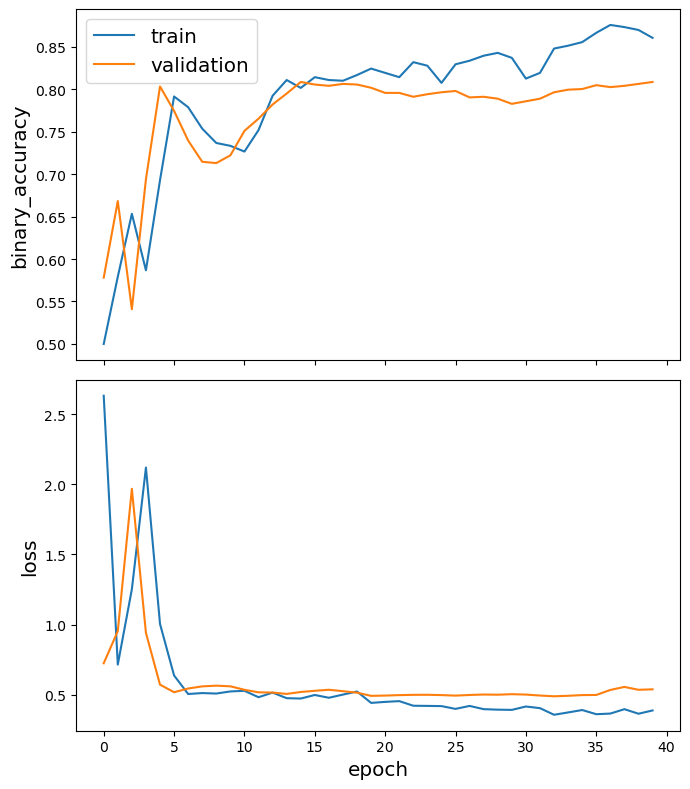

In [187]:
sg.utils.plot_history(history)

In [188]:
train_metrics = model.evaluate(train_flow)
test_metrics = model.evaluate(test_flow)

print("\nTrain Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, train_metrics):
    print("\t{}: {:0.4f}".format(name, val))

print("\nTest Set Metrics of the trained model:")
for name, val in zip(model.metrics_names, test_metrics):
    print("\t{}: {:0.4f}".format(name, val))

1/1 [==============================] - 0s 101ms/step - loss: 0.5387 - binary_accuracy: 0.8083

Train Set Metrics of the trained model:
	loss: 0.3356
	binary_accuracy: 0.8939

Test Set Metrics of the trained model:
	loss: 0.5387
	binary_accuracy: 0.8083


## TSNE

In [189]:
import dgl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from dgl.nn import GraphConv
import torch.nn.functional as F
import numpy as np
from sklearn.manifold import TSNE

In [190]:
display(wos_paper)

,DOI,Class,learning,development,represents,direction,research,computational,capabilities,resulting,...,moderated,interwoven,topographically,representatives,transferability,discriminant,employ,autonomously,safety,formally
0,1869,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,757,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2402,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1026,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,641,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,2520,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4951,4087,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4952,2458,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4953,1212,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
subset = wos_paper[wos_paper['DOI'].isin(wos_graph.nodes)]
# node_features = tf.cast(
#     subset.sort_values("DOI")[feature_names].to_numpy(), dtype=tf.dtypes.float32
# )
node_features = subset.drop(['DOI','Class'],axis=1)
node_labels = subset['Class']
n_features = node_features.shape[0]
# node_labels = wos_paper[wos_paper['DOI'].isin(list(wos_graph.nodes))].sort_values('DOI')['Class']
n_labels = int(node_labels.max() + 1)

In [192]:
# perform TSNE and visualize
tsne = TSNE(n_components=2)
tsne_res = tsne.fit_transform(node_features)


C:\Users\reece\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
C:\Users\reece\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [193]:
display(wos_paper)
print(node_features)
print(node_labels)

,DOI,Class,learning,development,represents,direction,research,computational,capabilities,resulting,...,moderated,interwoven,topographically,representatives,transferability,discriminant,employ,autonomously,safety,formally
0,1869,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,757,2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2402,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1026,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,641,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4950,2520,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4951,4087,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4952,2458,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4953,1212,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


      learning  development  represents  direction  research  computational  \
0          0.0          0.0         0.0        0.0       0.0            0.0   
1          0.0          1.0         0.0        0.0       0.0            0.0   
3          1.0          0.0         0.0        0.0       0.0            0.0   
4          1.0          0.0         0.0        0.0       0.0            0.0   
6          0.0          0.0         0.0        0.0       0.0            0.0   
...        ...          ...         ...        ...       ...            ...   
4945       0.0          0.0         0.0        0.0       0.0            0.0   
4946       0.0          0.0         0.0        0.0       0.0            0.0   
4947       0.0          0.0         0.0        0.0       0.0            0.0   
4951       0.0          0.0         0.0        0.0       0.0            0.0   
4952       0.0          0.0         0.0        0.0       0.0            0.0   

      capabilities  resulting  increasing  sophisti

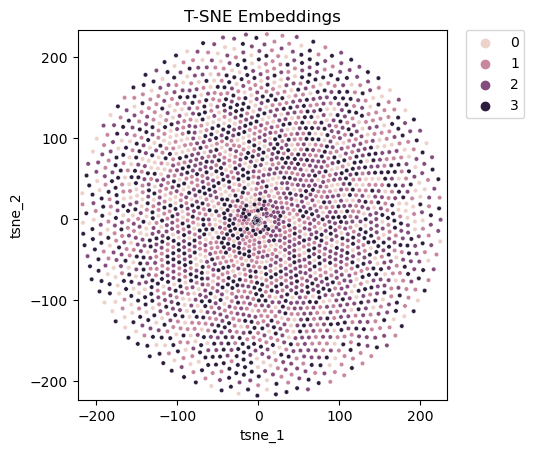

In [194]:
tsne_result_df = pd.DataFrame({'tsne_1': tsne_res[:,0], 'tsne_2': tsne_res[:,1], 'label': node_labels})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax,s=10)
lim = (tsne_res.min()-5, tsne_res.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_title('T-SNE Embeddings')
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)